# Campeonato Brasileiro 2009-2018
kaggle - https://www.kaggle.com/datasets/andreifnmg/campeonato-braileiro-20092018

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Tabela_Clubes.csv')
df

,Ano,Pos.,Clubes,Vitorias,Derrotas,Empates,GolsF/S,Saldo,Qtd_Jogadores,Idade_Media,Estrangeiros,Valor_total,Media_Valor,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,2017,18,America-MG,10,10,18,30:47,-17,51,"24,8",0,27350000,536000,NaN,NaN,NaN,NaN
1,2017,7,Athletico-PR,16,9,13,54:37,17,52,24,3,37650000,724000,NaN,NaN,NaN,NaN
2,2017,6,Atletico-MG,17,8,13,56:43,13,50,"23,4",6,61350000,1230000,NaN,NaN,NaN,NaN
3,2017,11,Bahia,12,12,14,39:41,-2,48,"23,2",2,34900000,727000,NaN,NaN,NaN,NaN
4,2017,9,Botafogo,13,12,13,38:46,-8,45,"23,1",4,25550000,568000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2008,18,Santo Andre,11,8,19,46:61,-15,43,"25,1",3,6230000,145000,NaN,NaN,NaN,NaN
196,2008,12,Santos,12,13,13,58:58,0,33,"23,9",1,27850000,844000,NaN,NaN,NaN,NaN
197,2008,3,Sao Paulo,18,11,9,57:42,15,30,"23,9",1,46650000,1560000,NaN,NaN,NaN,NaN
198,2008,20,Sport,7,10,21,48:71,-23,30,25,1,15600000,520000,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ano            200 non-null    int64  
 1   Pos.           200 non-null    int64  
 2   Clubes         200 non-null    object 
 3   Vitorias       200 non-null    int64  
 4   Derrotas       200 non-null    int64  
 5   Empates        200 non-null    int64  
 6   GolsF/S        200 non-null    object 
 7   Saldo          200 non-null    int64  
 8   Qtd_Jogadores  200 non-null    int64  
 9   Idade_Media    200 non-null    object 
 10  Estrangeiros   200 non-null    int64  
 11  Valor_total    200 non-null    int64  
 12  Media_Valor    200 non-null    int64  
 13  Unnamed: 13    1 non-null      float64
 14  Unnamed: 14    1 non-null      float64
 15  Unnamed: 15    1 non-null      object 
 16  Unnamed: 16    1 non-null      float64
dtypes: float64(3), int64(10), object(4)
memory usage: 26.7

# Excluindo colunas desnecessárias

In [4]:
a = df['Unnamed: 13'].unique()
b = df['Unnamed: 14'].unique()
c = df['Unnamed: 15'].unique()
d = df['Unnamed: 16'].unique()

print(f'{a}\n{b}\n{c}\n{d}')

[nan 10.]
[nan 21.]
[nan '39:64']
[ nan -25.]


In [5]:
df.drop(['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'], axis = 1, inplace = True)
df

,Ano,Pos.,Clubes,Vitorias,Derrotas,Empates,GolsF/S,Saldo,Qtd_Jogadores,Idade_Media,Estrangeiros,Valor_total,Media_Valor
0,2017,18,America-MG,10,10,18,30:47,-17,51,"24,8",0,27350000,536000
1,2017,7,Athletico-PR,16,9,13,54:37,17,52,24,3,37650000,724000
2,2017,6,Atletico-MG,17,8,13,56:43,13,50,"23,4",6,61350000,1230000
3,2017,11,Bahia,12,12,14,39:41,-2,48,"23,2",2,34900000,727000
4,2017,9,Botafogo,13,12,13,38:46,-8,45,"23,1",4,25550000,568000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2008,18,Santo Andre,11,8,19,46:61,-15,43,"25,1",3,6230000,145000
196,2008,12,Santos,12,13,13,58:58,0,33,"23,9",1,27850000,844000
197,2008,3,Sao Paulo,18,11,9,57:42,15,30,"23,9",1,46650000,1560000
198,2008,20,Sport,7,10,21,48:71,-23,30,25,1,15600000,520000


In [6]:
df.shape

(200, 13)

In [7]:
df['Ano'].unique()

array([2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008],
      dtype=int64)

# Arrumando a coluna ano, pois os registros da tabela informam 2008-2017 e o correto é 2009-2018

In [8]:
df['Ano'] = df['Ano'] + 1
df['Ano'].unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009],
      dtype=int64)

# Separando a coluna "GolsF/S" em "Gols Feitos" e "Gols Sofridos"

In [9]:
sep = df['GolsF/S'].str.split(':')
gols_feitos = sep.str.get(0)
gols_sofridos = sep.str.get(1)
df['Gols_Feitos'] = gols_feitos.astype(int)
df['Gols_Sofridos'] = gols_sofridos.astype(int)

df.drop('GolsF/S', axis=1, inplace=True)

df

,Ano,Pos.,Clubes,Vitorias,Derrotas,Empates,Saldo,Qtd_Jogadores,Idade_Media,Estrangeiros,Valor_total,Media_Valor,Gols_Feitos,Gols_Sofridos
0,2018,18,America-MG,10,10,18,-17,51,"24,8",0,27350000,536000,30,47
1,2018,7,Athletico-PR,16,9,13,17,52,24,3,37650000,724000,54,37
2,2018,6,Atletico-MG,17,8,13,13,50,"23,4",6,61350000,1230000,56,43
3,2018,11,Bahia,12,12,14,-2,48,"23,2",2,34900000,727000,39,41
4,2018,9,Botafogo,13,12,13,-8,45,"23,1",4,25550000,568000,38,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2009,18,Santo Andre,11,8,19,-15,43,"25,1",3,6230000,145000,46,61
196,2009,12,Santos,12,13,13,0,33,"23,9",1,27850000,844000,58,58
197,2009,3,Sao Paulo,18,11,9,15,30,"23,9",1,46650000,1560000,57,42
198,2009,20,Sport,7,10,21,-23,30,25,1,15600000,520000,48,71


# Renomeando colunas

In [56]:
df.columns = ['Ano', 'Posicao', 'Clubes', 'Vitorias', 'Derrotas', 'Empates', 'Saldo', 'Qtd_Jogadores',
              'Idade_Media', 'Estrangeiros', 'Valor_total','Media_Valor', 'Gols_Feitos', 'Gols_Sofridos']
df

,Ano,Posicao,Clubes,Vitorias,Derrotas,Empates,Saldo,Qtd_Jogadores,Idade_Media,Estrangeiros,Valor_total,Media_Valor,Gols_Feitos,Gols_Sofridos
0,2018,18,America-MG,10,10,18,-17,51,"24,8",0,27350000,536000,30,47
1,2018,7,Athletico-PR,16,9,13,17,52,24,3,37650000,724000,54,37
2,2018,6,Atletico-MG,17,8,13,13,50,"23,4",6,61350000,1230000,56,43
3,2018,11,Bahia,12,12,14,-2,48,"23,2",2,34900000,727000,39,41
4,2018,9,Botafogo,13,12,13,-8,45,"23,1",4,25550000,568000,38,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2009,18,Santo Andre,11,8,19,-15,43,"25,1",3,6230000,145000,46,61
196,2009,12,Santos,12,13,13,0,33,"23,9",1,27850000,844000,58,58
197,2009,3,Sao Paulo,18,11,9,15,30,"23,9",1,46650000,1560000,57,42
198,2009,20,Sport,7,10,21,-23,30,25,1,15600000,520000,48,71


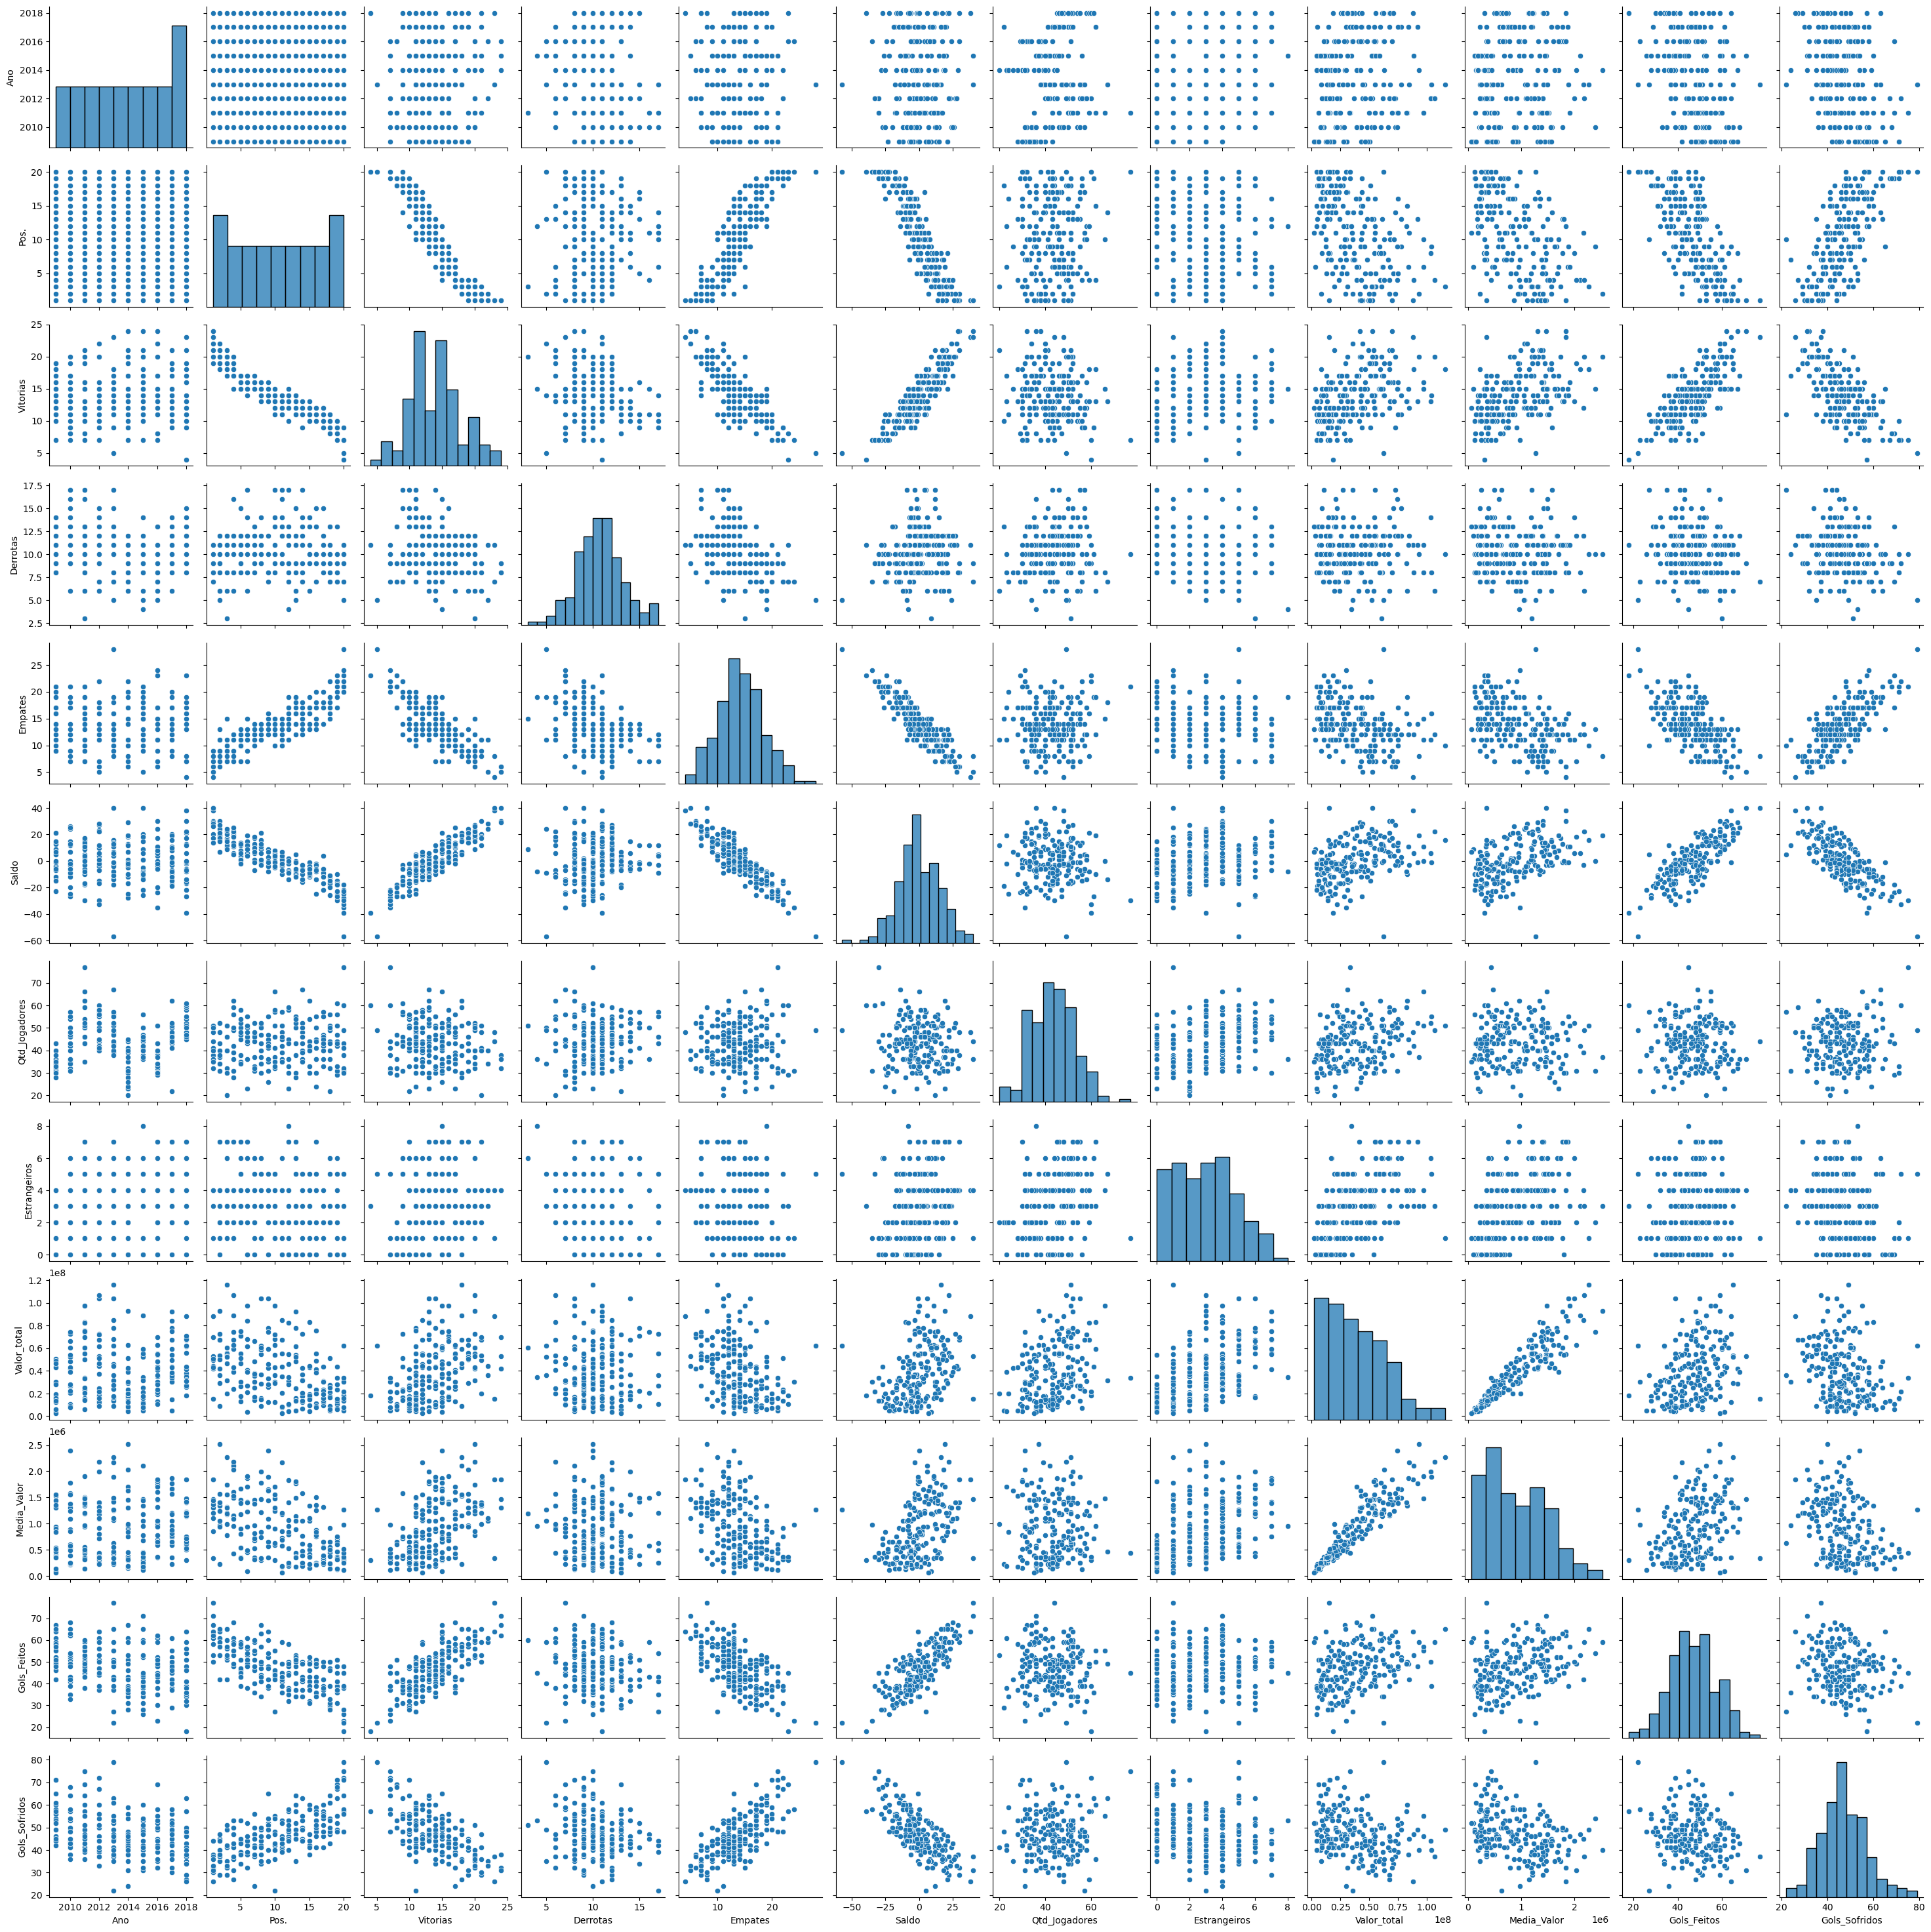

In [10]:
sns.pairplot(df)

# Saldo de gols dos 3 primeiros colocados de cada temporada

In [104]:
saldo_gol_colocados = df[{'Ano', 'Posicao', 'Clubes', 'Saldo'}]
saldo_gol_colocados = saldo_gol_colocados[saldo_gol_colocados['Posicao'] < 4].sort_values(['Ano', 'Posicao'], ascending=True)
saldo_gol_colocados

,Ano,Posicao,Clubes,Saldo
187,2009,1,Flamengo,14
191,2009,2,Internacional,21
197,2009,3,Sao Paulo,15
169,2010,1,Fluminense,26
167,2010,2,Cruzeiro,15
166,2010,3,Corinthians,24
148,2011,1,Corinthians,17
159,2011,2,Vasco,17
153,2011,3,Fluminense,9
129,2012,1,Fluminense,28


## Estatística do saldo de gols

In [105]:
saldo_gol_colocados['Saldo'].describe()

count    30.000000
mean     21.466667
std       8.589221
min       7.000000
25%      16.000000
50%      20.000000
75%      26.750000
max      40.000000
Name: Saldo, dtype: float64

<Figure size 1500x1000 with 0 Axes>

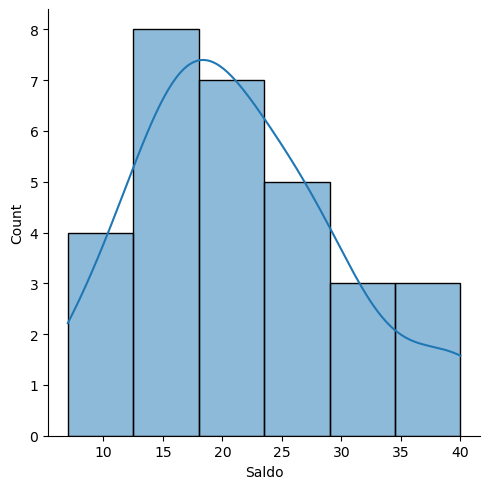

In [106]:
plt.figure(figsize = (15, 10))
sns.displot(saldo_gol_colocados['Saldo'], kde=True)
plt.show()

# Soma de vitórias dos clubes em ordem decrescente nos 10 anos (2009-2018)

In [11]:
vitorias = df[{'Clubes', 'Vitorias'}]
vitorias = vitorias.groupby('Clubes', as_index=False).sum()
vitorias = vitorias.sort_values('Vitorias', ascending=False)
vitorias

,Clubes,Vitorias
17,Gremio,170
9,Corinthians,170
12,Cruzeiro,169
30,Sao Paulo,164
3,Atletico-MG,163
29,Santos,153
15,Fluminense,152
14,Flamengo,152
19,Internacional,143
22,Palmeiras,141


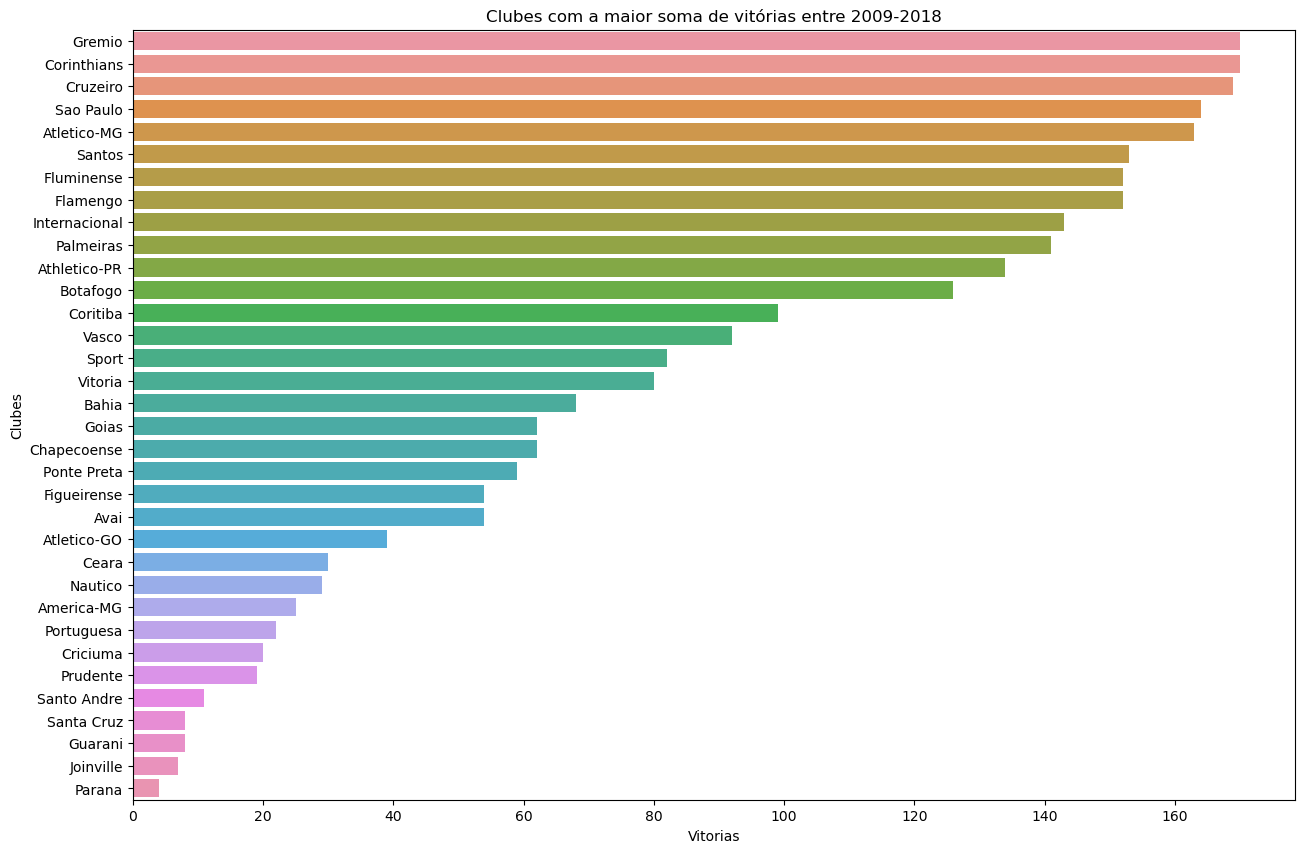

In [12]:
plt.figure(figsize=(15,10))
sns.barplot(data=vitorias, x='Vitorias', y='Clubes')
plt.xlabel('Vitorias')
plt.ylabel('Clubes')
plt.title('Clubes com a maior soma de vitórias entre 2009-2018')
plt.show()

# Soma de derrotas dos clubes em ordem decrescente nos 10 anos (2009-2018)

In [13]:
derrotas = df[{'Clubes', 'Derrotas'}]
derrotas = derrotas.groupby('Clubes', as_index=False).sum()
derrotas = derrotas.sort_values('Derrotas', ascending=False)
derrotas

,Clubes,Derrotas
14,Flamengo,115
9,Corinthians,109
29,Santos,104
17,Gremio,102
30,Sao Paulo,100
6,Botafogo,97
15,Fluminense,97
19,Internacional,95
3,Atletico-MG,92
12,Cruzeiro,91


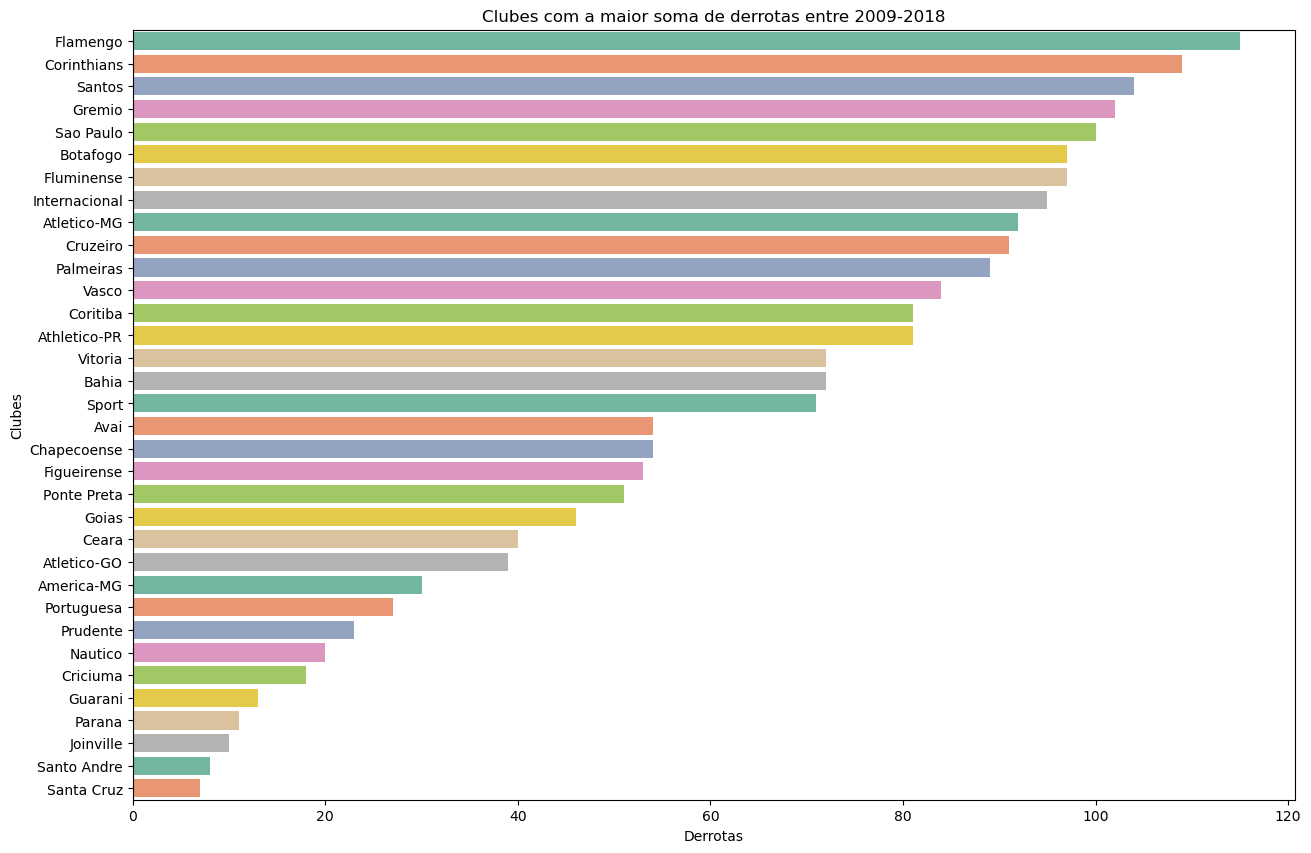

In [14]:
plt.figure(figsize=(15,10))
sns.barplot(data=derrotas, x='Derrotas', y='Clubes',  palette='Set2')
plt.xlabel('Derrotas')
plt.ylabel('Clubes')
plt.title('Clubes com a maior soma de derrotas entre 2009-2018')
plt.show()

# Evolução da idade média dos atletas ao longo dos 10 anos

In [15]:
idade_media = df[{'Ano', 'Idade_Media'}]
sep1 = idade_media['Idade_Media'].str.split(',')
sep2 = sep1.str.get(0)

idade_media['Idade_Media_Tratada'] = sep2
idade_media['Idade_Media_Tratada'] = idade_media['Idade_Media_Tratada'].astype(int)
idade_media.drop('Idade_Media', axis=1, inplace=True)

idade_media = idade_media.groupby('Ano', as_index=False).mean()

idade_media

,Ano,Idade_Media_Tratada
0,2009,23.20
1,2010,23.40
2,2011,23.25
3,2012,23.40
4,2013,23.40
5,2014,24.10
6,2015,23.75
7,2016,23.90
8,2017,23.45
9,2018,23.50


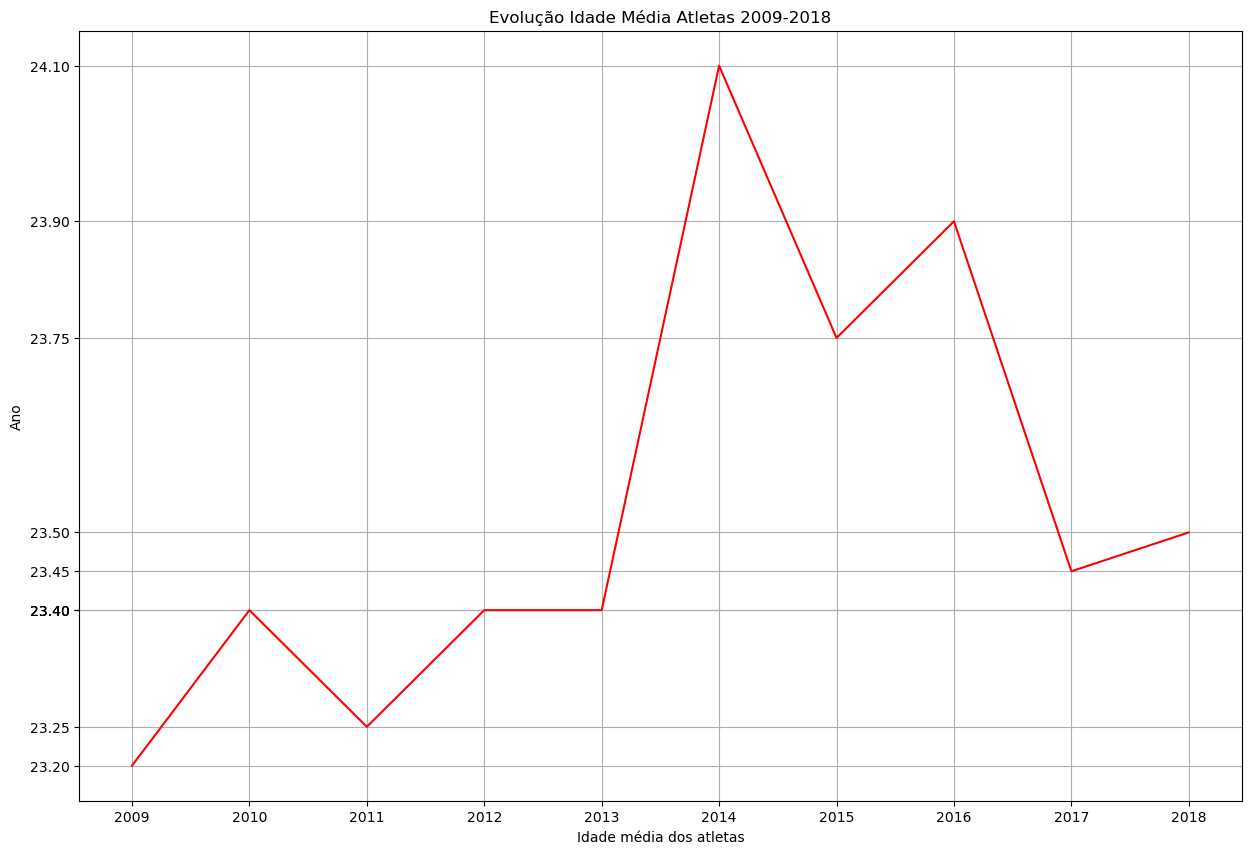

In [16]:
plt.figure(figsize=(15,10))
plt.grid(True)
sns.lineplot(data = idade_media, x='Ano', y='Idade_Media_Tratada', color='red')
plt.xlabel('Idade média dos atletas')
plt.xticks(idade_media['Ano'])
plt.yticks(idade_media['Idade_Media_Tratada'])
plt.ylabel('Ano')
plt.title('Evolução Idade Média Atletas 2009-2018')
plt.show()

# Média de gols feitos por clube nos 10 anos (2009-2018)

In [17]:
media_gols_feitos = df[{'Clubes', 'Gols_Feitos'}]
media_gols_feitos['Gols_Feitos'].astype(int)
media_gols_feitos = round(media_gols_feitos.groupby('Clubes', as_index=False).mean(), 1)
media_gols_feitos = media_gols_feitos.sort_values('Gols_Feitos', ascending=False)
media_gols_feitos

,Clubes,Gols_Feitos
3,Atletico-MG,55.5
29,Santos,52.5
12,Cruzeiro,52.3
30,Sao Paulo,51.6
17,Gremio,51.4
22,Palmeiras,51.4
15,Fluminense,50.3
9,Corinthians,49.8
19,Internacional,49.2
14,Flamengo,49.1


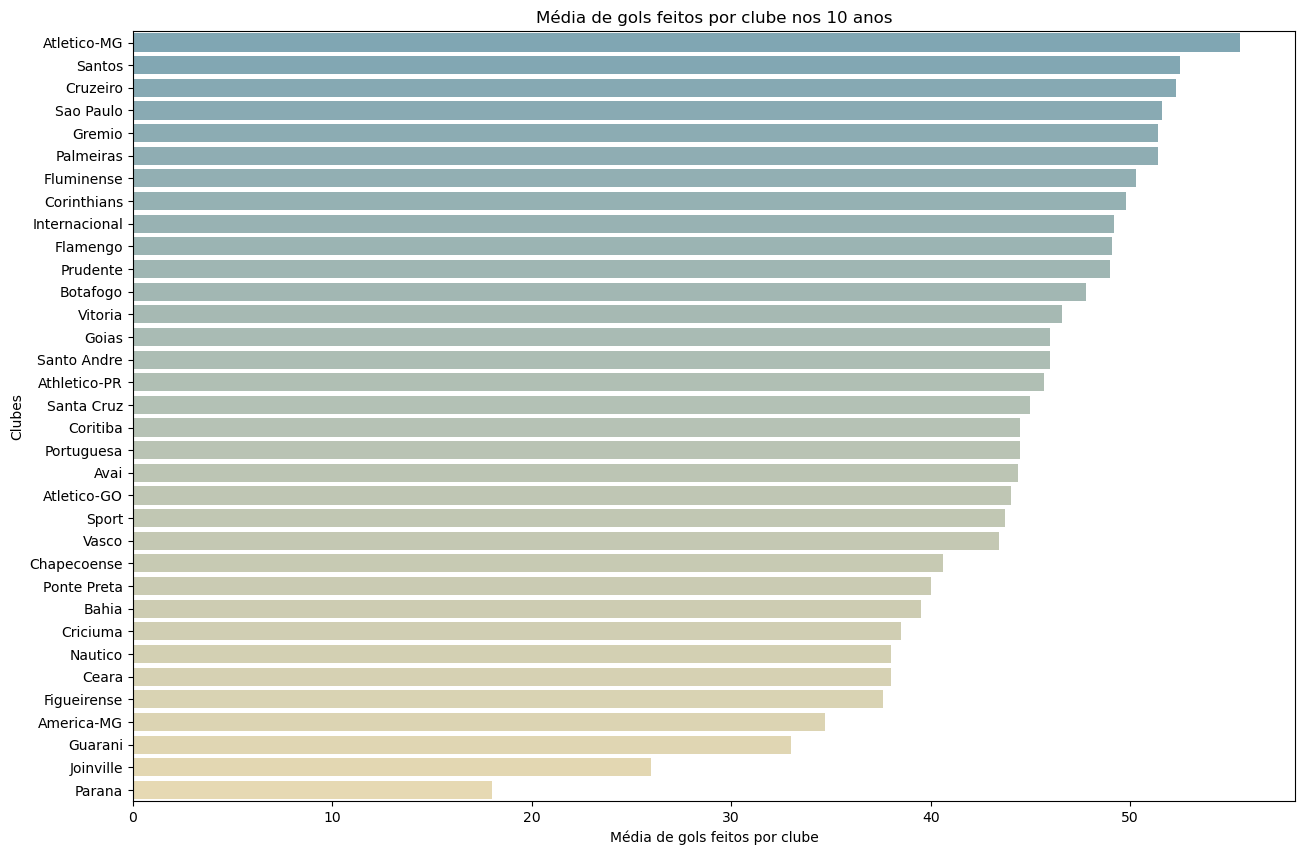

In [18]:
plt.figure(figsize=(15,10))
sns.barplot(data = media_gols_feitos, x='Gols_Feitos', y='Clubes', palette = "blend:#7AB,#EDA")
plt.xlabel('Média de gols feitos por clube')
plt.ylabel('Clubes')
plt.title('Média de gols feitos por clube nos 10 anos')
plt.show()

# Média geral de gols por campeonato

In [19]:
media_gols_temporada = df[{'Ano', 'Gols_Feitos'}]
media_gols_temporada['Gols_Feitos'].astype(int)
media_gols_temporada = round(media_gols_temporada.groupby('Ano', as_index=False).mean(), 1)
media_gols_temporada = media_gols_temporada.sort_values('Ano', ascending=True)
media_gols_temporada

,Ano,Gols_Feitos
0,2009,54.7
1,2010,48.9
2,2011,50.8
3,2012,47.0
4,2013,46.8
5,2014,43.0
6,2015,44.8
7,2016,45.6
8,2017,46.2
9,2018,41.4


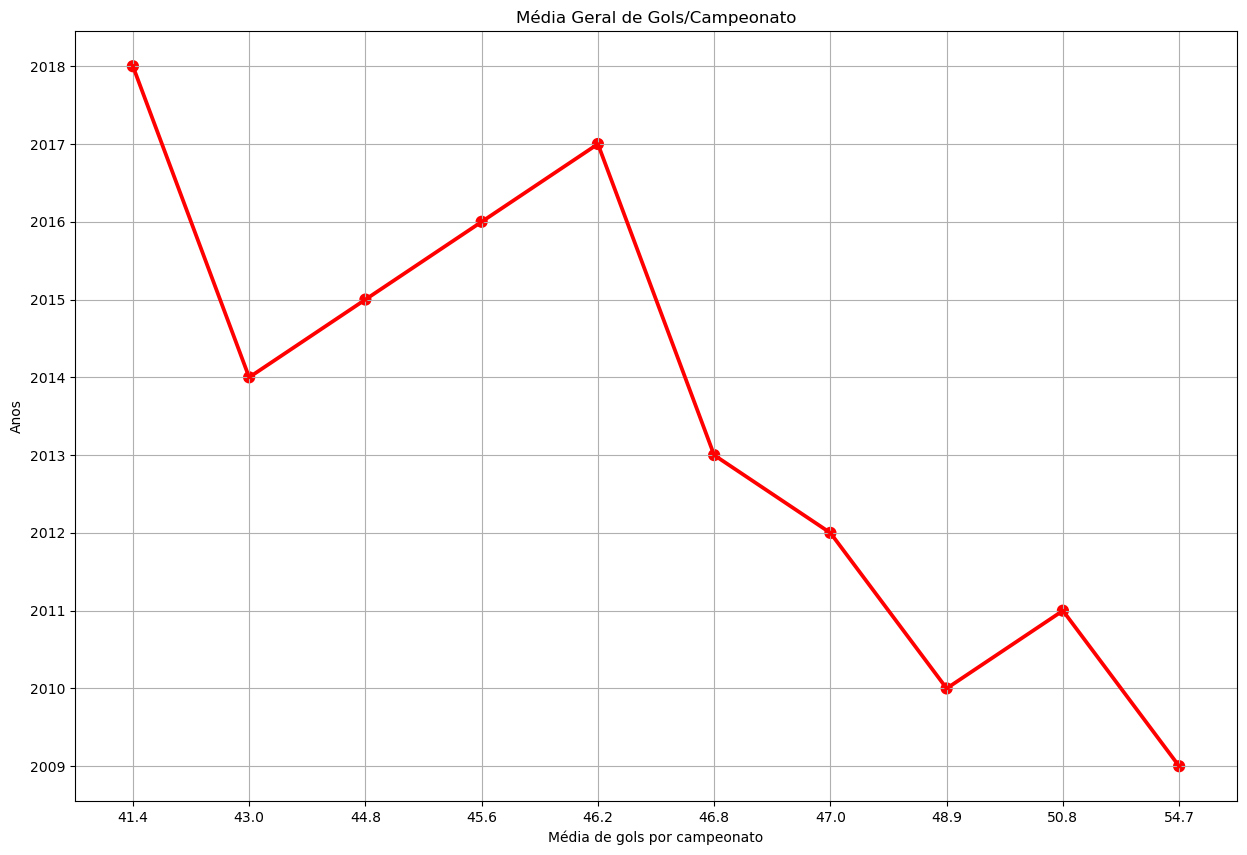

In [20]:
plt.figure(figsize=(15,10))
sns.pointplot(data = media_gols_temporada, x='Gols_Feitos', y='Ano', color='red')
plt.xlabel('Média de gols por campeonato')
plt.ylabel('Anos')
plt.yticks(media_gols_temporada['Ano'])
plt.title('Média Geral de Gols/Campeonato')
plt.grid(True)
plt.show()

# Média dos gols sofridos por clube nos 10 anos (2009-2018)

In [21]:
gols_sofridos = df[{'Clubes', 'Gols_Sofridos'}]
gols_sofridos['Gols_Sofridos'].dtype
gols_sofridos = gols_sofridos.groupby('Clubes', as_index=False).mean()
gols_sofridos = gols_sofridos.sort_values('Gols_Sofridos', ascending=False)
gols_sofridos

,Clubes,Gols_Sofridos
27,Santa Cruz,69.000000
21,Nautico,67.000000
28,Santo Andre,61.000000
11,Criciuma,59.500000
4,Avai,58.600000
0,America-MG,58.000000
26,Prudente,58.000000
23,Parana,57.000000
2,Atletico-GO,56.250000
33,Vitoria,55.142857


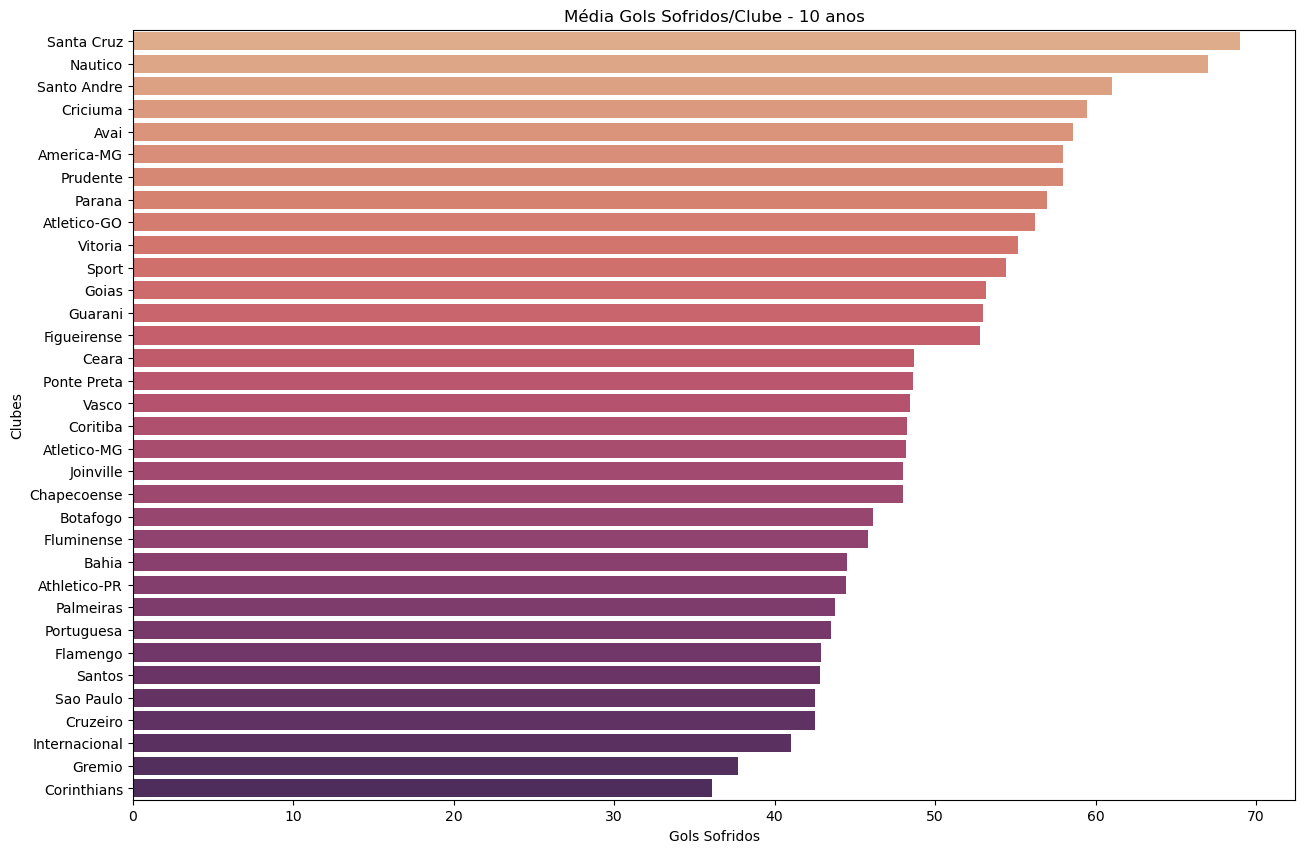

In [22]:
plt.figure(figsize=(15,10))
sns.barplot(data = gols_sofridos, x='Gols_Sofridos', y = 'Clubes',  palette = "flare")
plt.xlabel('Gols Sofridos')
plt.ylabel('Clubes')
plt.title('Média Gols Sofridos/Clube - 10 anos')
plt.show()

# Valor total gasto pelos clubes ao longo das 10 temporadas (2009-2018) com jogadores

In [23]:
valor_total_gasto = df[{'Clubes', 'Valor_total'}]
valor_total_gasto = valor_total_gasto.groupby('Clubes', as_index=False).sum()
valor_total_gasto = valor_total_gasto.sort_values('Valor_total', ascending=False)
valor_total_gasto

,Clubes,Valor_total
30,Sao Paulo,836780000
14,Flamengo,590810000
3,Atletico-MG,543580000
9,Corinthians,537530000
29,Santos,531630000
12,Cruzeiro,513910000
22,Palmeiras,496330000
19,Internacional,494500000
17,Gremio,455030000
15,Fluminense,454000000


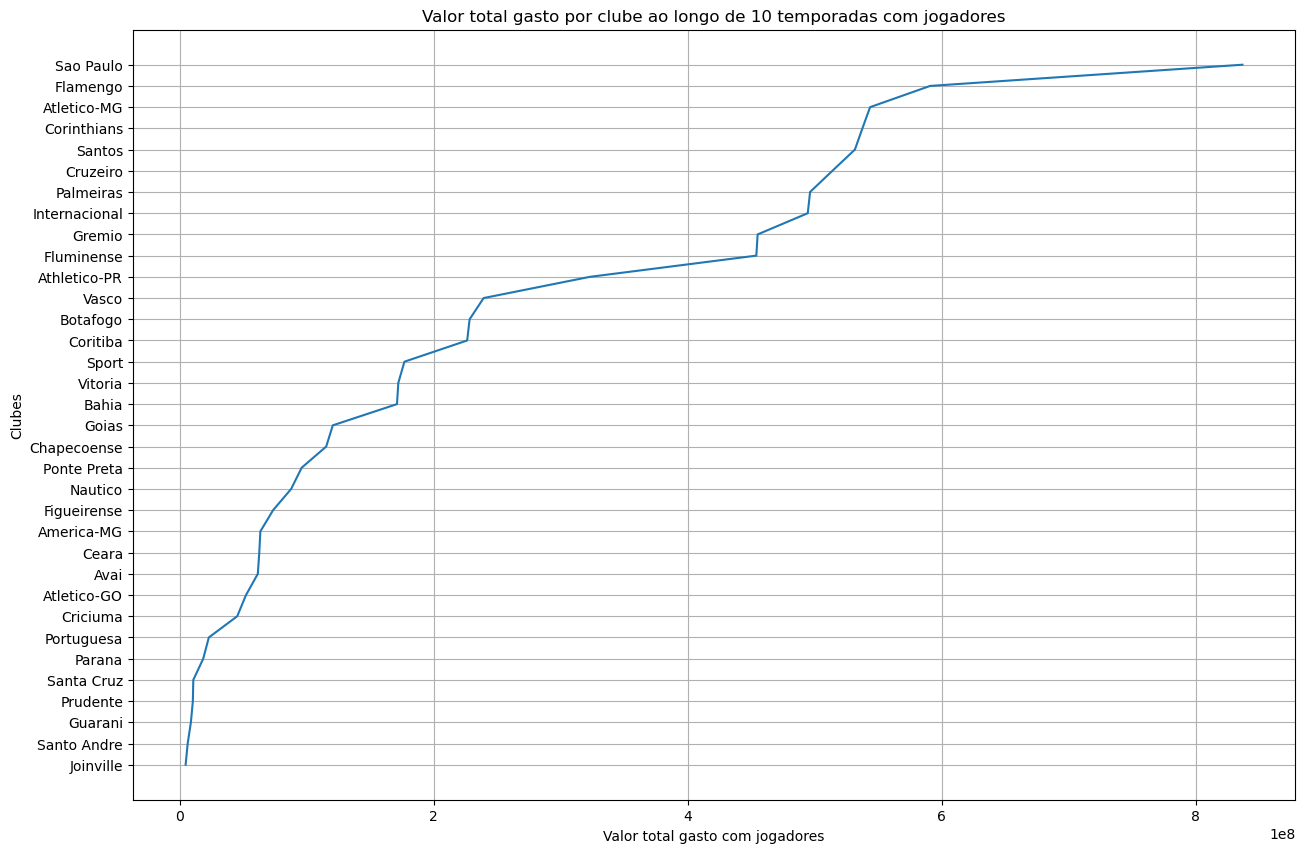

In [42]:
plt.figure(figsize=(15,10))
sns.lineplot(data=valor_total_gasto, x='Valor_total', y='Clubes')
plt.xlabel('Valor total gasto com jogadores')
plt.ylabel('Clubes')
plt.title('Valor total gasto por clube ao longo de 10 temporadas com jogadores')
plt.grid(True)
plt.show()